In [1]:
from library.objective_function import *
from library.optimiser import *
from library.post_analysis import *
from library.experiments import *
%matplotlib notebook
np.set_printoptions(formatter={'float': lambda x: "{0:5.6f}".format(x)})
SEED = 23191

## optimise one dimension function

In [2]:
ak_1d = ackley(dim=1) 

<IPython.core.display.Javascript object>


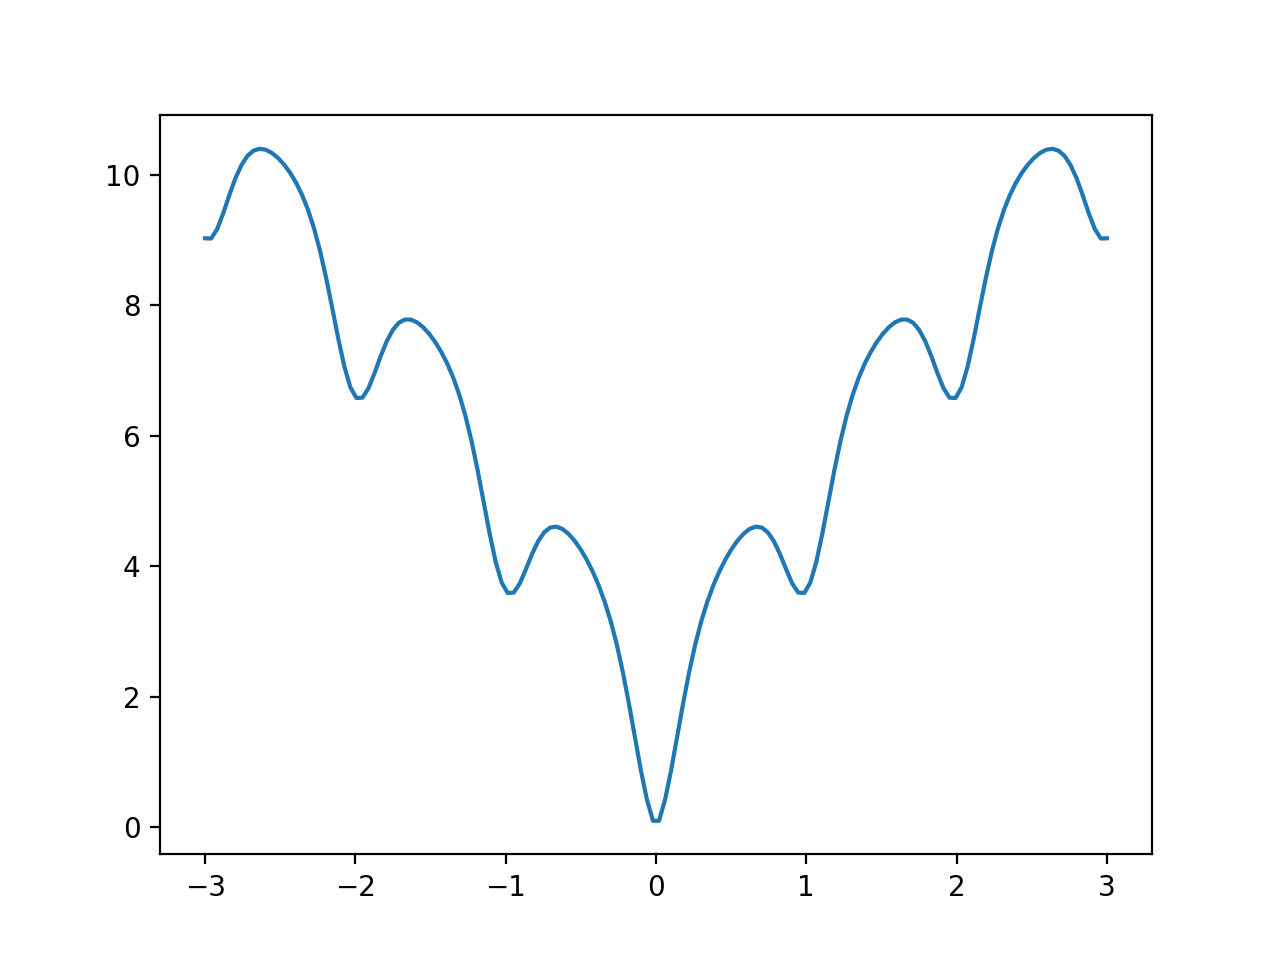

In [3]:
ak_1d.visualise1d(lim=3, n=150)

### line search 

### two failed cases

In [4]:
ak_1d = ackley(dim=1) 
ls = line_search()
x0 = np.array([12.64232])
optmizerParas = {'x0': x0,
         'alpha': 10,
         'beta': 0.01, 
         'max_iter': 30,
         'tol': 1e-3,              
         'verbose': True,
         'record': True }
ls.set_parameters(optmizerParas)
arg, val, stats = ls.optimise(ak_1d)


*******starting optimisation from intitial point:  [12.642320]
total evaluatios = 31
gradient at stop position = [-0.000251]
found minimum position = [12.997227], found minimum = 18.514116917921566


In [11]:
class post_analy1d:
    def __init__(self, stats):
        self.stats = stats
        self.n = self.stats['val'].shape[0]
        #self.xs = np.linspace(np.min(self.stats['arg'])-2, np.max(self.stats['arg'])+2, 150)
        #self.trace = stats['trace']
            
    def animate_moving_position(self):
        def animate(i):
            #plt.clf()
            ax = fig.add_subplot(1, 1, 1)    
            ax.set_title('iter=%d' % (i+1))
            p = sns.scatterplot(x=arg[i], y=val[i], color="red", hue=i,
                            hue_norm=(0, self.n), s=73,legend=False)
            plt.plot(self.xs, self.fs, c="green")
        if self.stats['arg'].shape[1] > 1:
            # only leave the first column, the smallest candidate
            arg = self.stats['arg'][:,0]
            val = self.stats['val'][:,0]
        else:
            arg = self.stats['arg']
            val = self.stats['val']
        fig = plt.figure(figsize=(8,4))
        ani = animation.FuncAnimation(fig, animate, frames=self.n-1, repeat=False, interval=500)
        return ani
    
    def animate_moving_cluster(self):
        def animate(i):
            plt.clf()
            ax = fig.add_subplot(1, 1, 1)    
            ax.set_title('iter=%d' % (i+1))
        ''' ax.set_xlim(np.min(arg), np.max(arg))
            ax.set_ylim(np.min(val), np.max(val))
            ax.axvline(self.stats['mean'][i], c='blue', lw=1)
            ax.axvline(self.stats['mean'][i] - 1 * self.stats['std'][i], c='grey', lw=1)
            ax.axvline(self.stats['mean'][i] + 1 * self.stats['std'][i], c='grey', lw=1)
            p = sns.scatterplot(x=arg[i], y=val[i], color="red", hue=i,
                            hue_norm=(0, self.n), s=73,legend=False)
            plt.plot(self.xs, self.fs, c="green")'''
        arg = self.stats['arg'].squeeze()
        val = self.stats['val'].squeeze()
        fig = plt.figure(figsize=(8,4))
        ani = animation.FuncAnimation(fig, animate, frames=self.n-1, repeat=False, interval=500)
        return ani
    
    def plot_grandient_before_after(self):
        x = np.arange(stats['gradient_before_after'].shape[0]-1)  # the label locations
        width = 0.35  # the width of the bars
        num = stats['gradient_before_after'].shape[2]

        fig = plt.figure(figsize=(8, 4*num))
        for i in range(num):
            ax = fig.add_subplot(num, 1, i+1)
            ax.bar(x-width/2, self.stats['gradient_before_after'][1:, 0, i], width, color="b", label='original')
            ax.plot(x-width/2, self.stats['gradient_before_after'][1:, 0, i], color="b")

            # Add some text for labels, title and custom x-axis tick labels, etc.
            ax.set_ylabel('gradient')
            if i == 0:
                ax.set_title('gradient before and after adjustment')
            #ax.set_xticks(x)
            ax.set_yticks(np.linspace(-10, 10, 11))
            ax.axhline(c='grey', lw=1)
            ax.set_ylim(-14, 14)
            ax.legend()

            ax = ax.twinx()  
            rects2 = ax.bar(x+width/2, self.stats['gradient_before_after'][1:, 1, i], width, color="y", label='moving averge')
            ax.plot(x+width/2, self.stats['gradient_before_after'][1:, 1, i], color="y")
            ax.set_ylabel('gradient')
            #ax.set_xticks(x)
            ax.set_yticks(np.linspace(-1, 1, 11))
            ax.set_ylim(-1.4, 1.4)
            ax.legend(loc='lower right') 

<IPython.core.display.Javascript object>


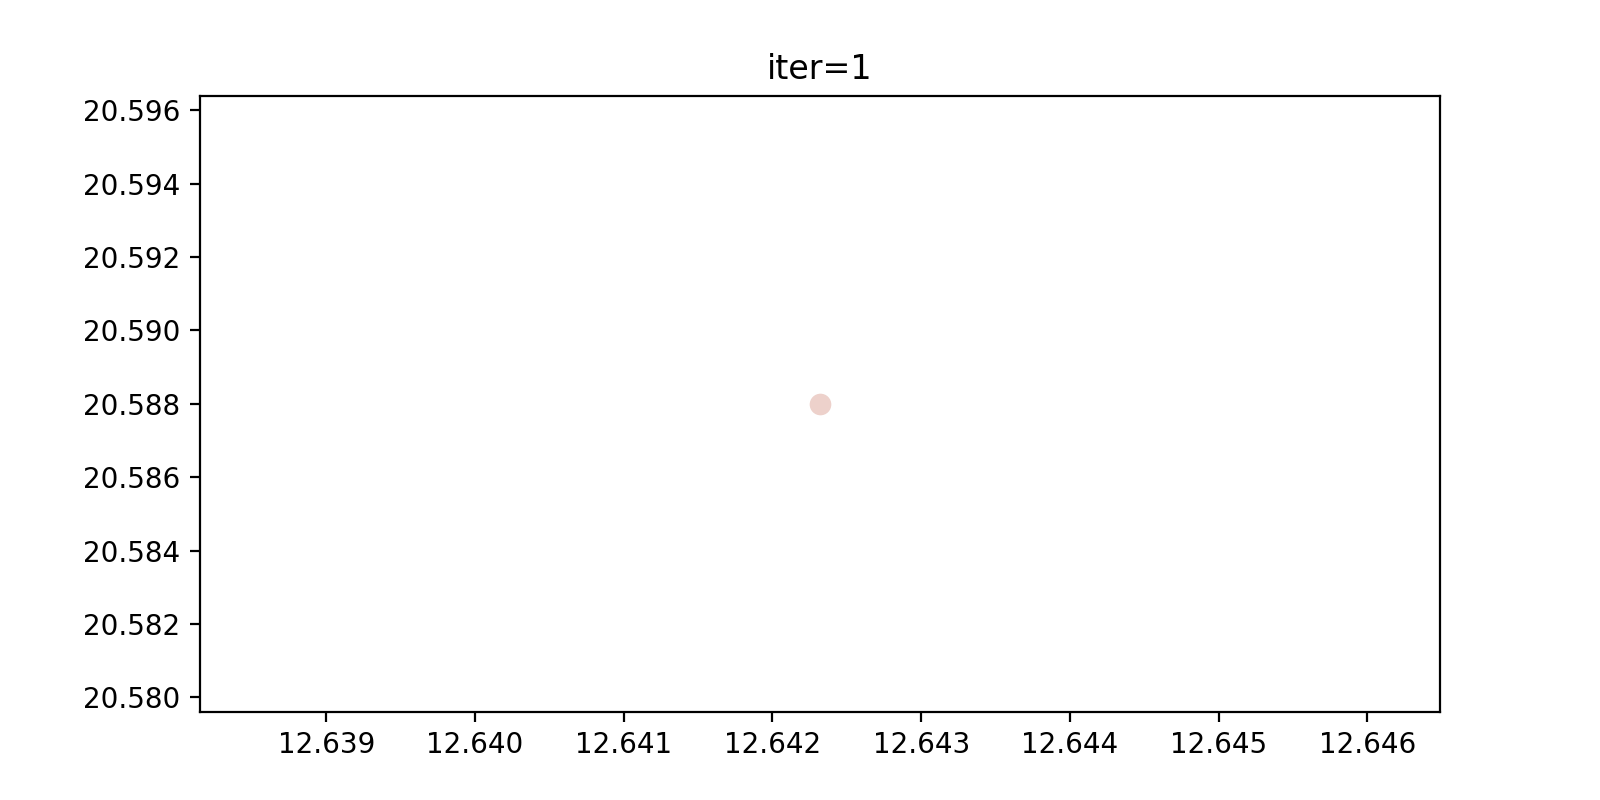

In [12]:
ana = post_analy1d(stats)
ana.animate_moving_position()

In [140]:
ls = line_search()
x0 = np.array([12.04232])
optmizerParas = {'x0': x0,
         'alpha': 2,
         'beta': 0.01, 
         'max_iter': 30,
         'tol': 1e-3,              
         'verbose': True,
         'record': True }
ls.set_parameters(optmizerParas)
arg, val, stats = ls.optimise(ak_1d)


*******starting optimisation from intitial point:  [12.042320]
total evaluatios = 34
gradient at stop position = [0.000977]
found minimum position = [2.979233], found minimum = 9.001093482916406


In [141]:
stats

{'status': None,
 'gradient': array([[4.692994],
        [-0.648287],
        [0.129521],
        [-0.079604],
        [0.048760],
        [-0.029931],
        [0.018350],
        [-0.011258],
        [0.006904],
        [-0.004235],
        [0.002598],
        [-0.001593],
        [0.000977]]),
 'arg': array([[12.042320],
        [2.656332],
        [2.980476],
        [2.978452],
        [2.979696],
        [2.978934],
        [2.979402],
        [2.979115],
        [2.979291],
        [2.979183],
        [2.979249],
        [2.979209],
        [2.979233]]),
 'val': array([18.294807, 10.387090, 9.001174, 9.001124, 9.001105, 9.001098,
        9.001095, 9.001094, 9.001094, 9.001094, 9.001094, 9.001093,
        9.001093]),
 'evals': 34}

<IPython.core.display.Javascript object>


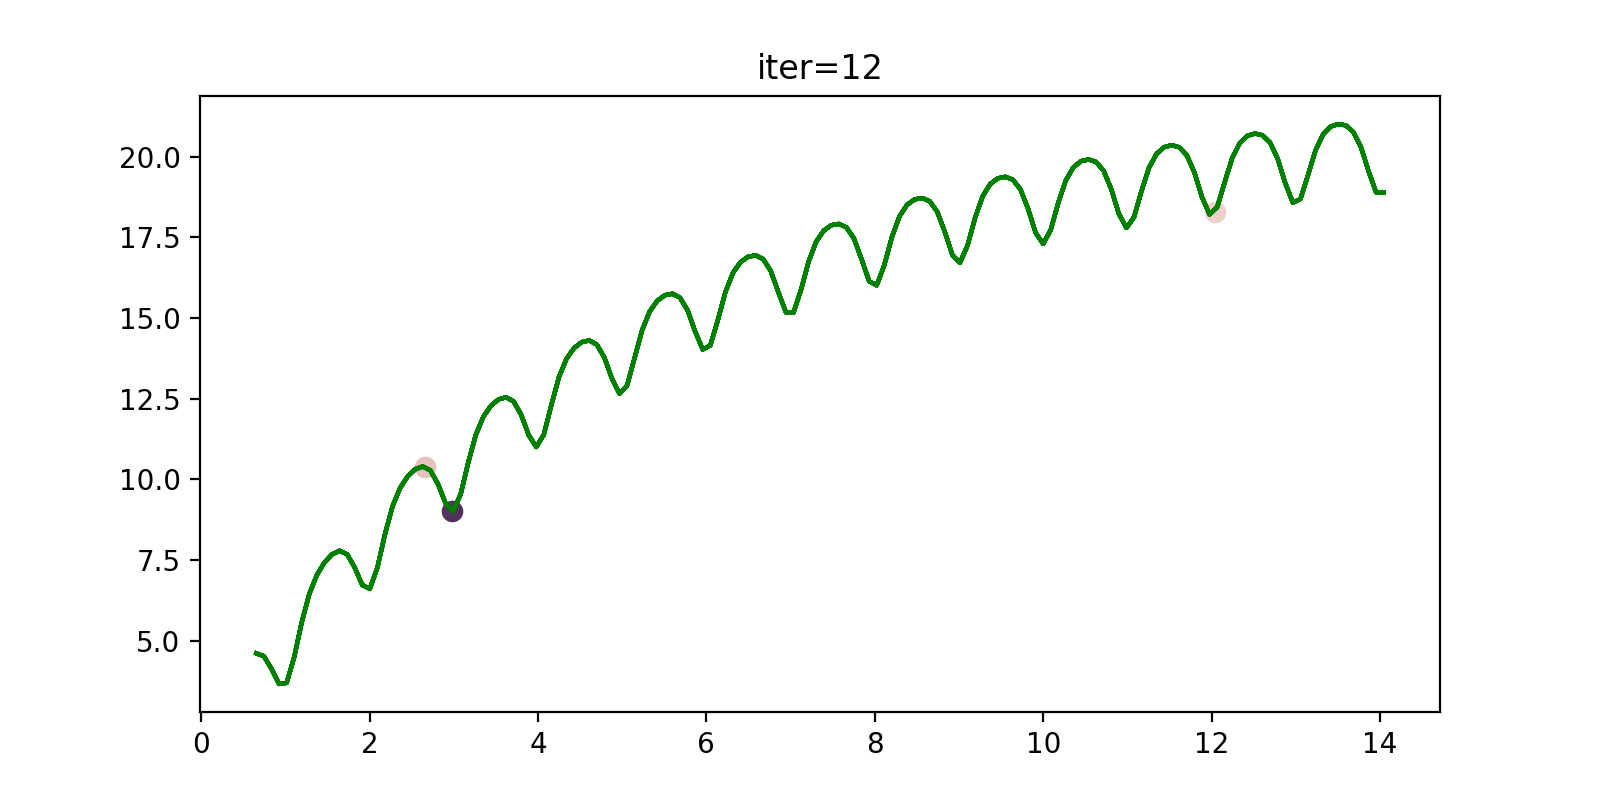

In [121]:
ana = post_analy1d(stats, ak_1d)
ana.animate_moving_position()

### successful case 

In [122]:
ls = line_search()
x0 = np.array([42.24232])
optmizerParas = {'x0': x0,
         'alpha': 10,
         'beta': 0.01, 
         'max_iter': 30,
         'tol': 1e-3,              
         'verbose': True,
         'record': True }
ls.set_parameters(optmizerParas)
arg, val, stats = ls.optimise(ak_1d)


*******starting optimisation from intitial point:  [42.242320]
total evaluatios = 30
gradient at stop position = [0.000000]
found minimum position = [-0.000040], found minimum = 0.0001592027513521721


<IPython.core.display.Javascript object>


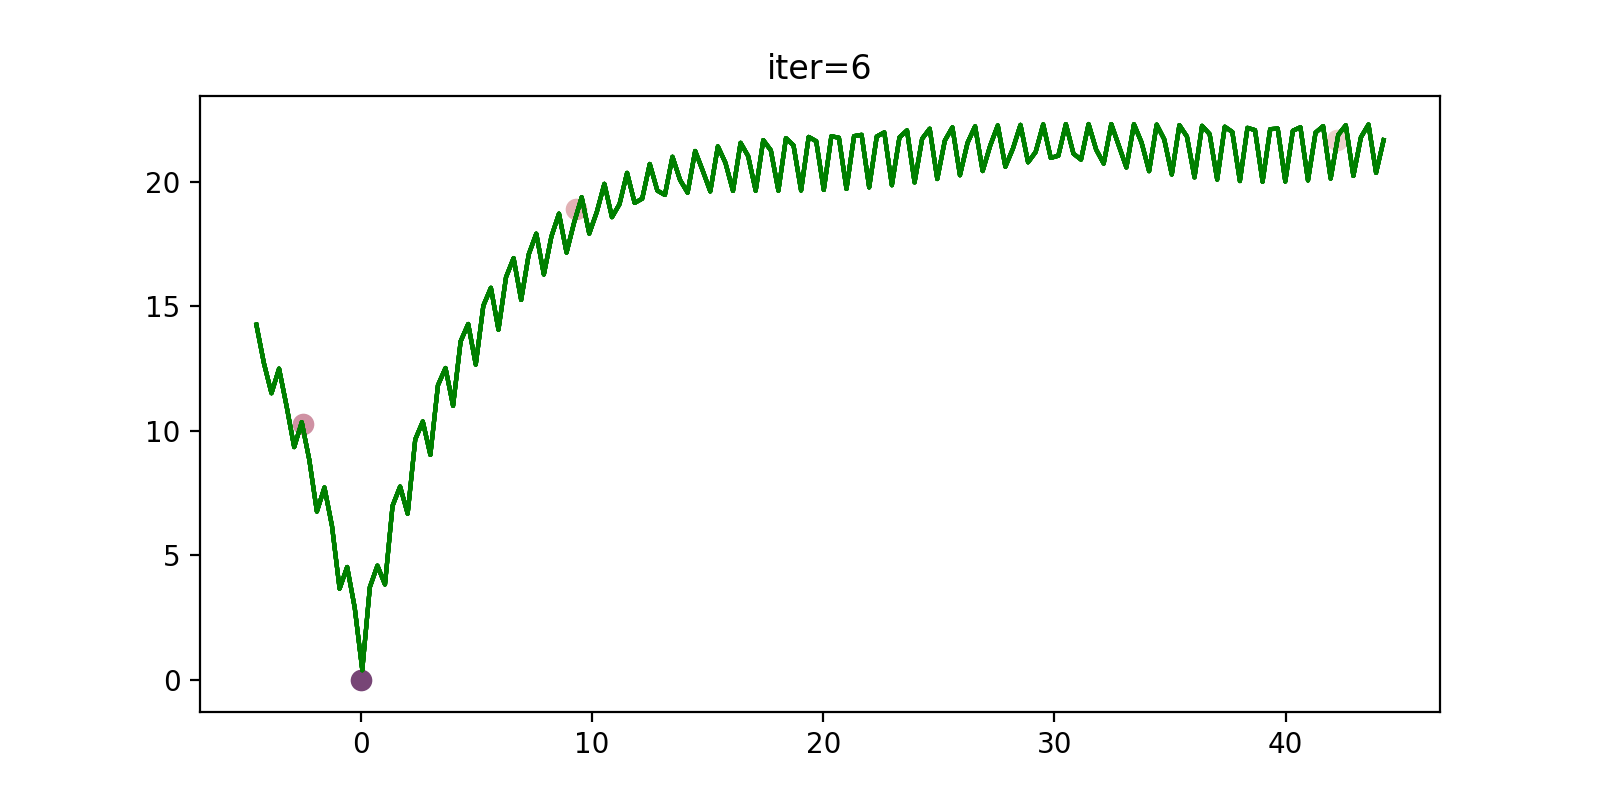

In [124]:
ana = post_analy1d(stats, ak_1d)
ana.animate_moving_position()

remark:

large alpha(step size), little beta(threshold) is beneficial to search more globally

### adam
### one successful case

In [125]:
ad = adam()
x0 = np.array([52.34232])
optmizerParas = {
         'x0': x0,
         'alpha': 0.8,
         'beta_1': 0.9, 
         'beta_2': 0.999, 
         'epsilon': 1e-11, 
         'max_iter': 200,
         'tol': 1e-3,              
         'verbose': True,
         'record': True }
ad.set_parameters(optmizerParas)
arg, val, stats = ad.optimise(ak_1d)



*******starting optimisation from intitial point:  [52.342320]
total evaluatios = 175
gradient at stop position = [-0.443355],
modified graident = [-0.000622]
found minimum position = [-0.972435], found minimum = 3.5752277570691047


<IPython.core.display.Javascript object>


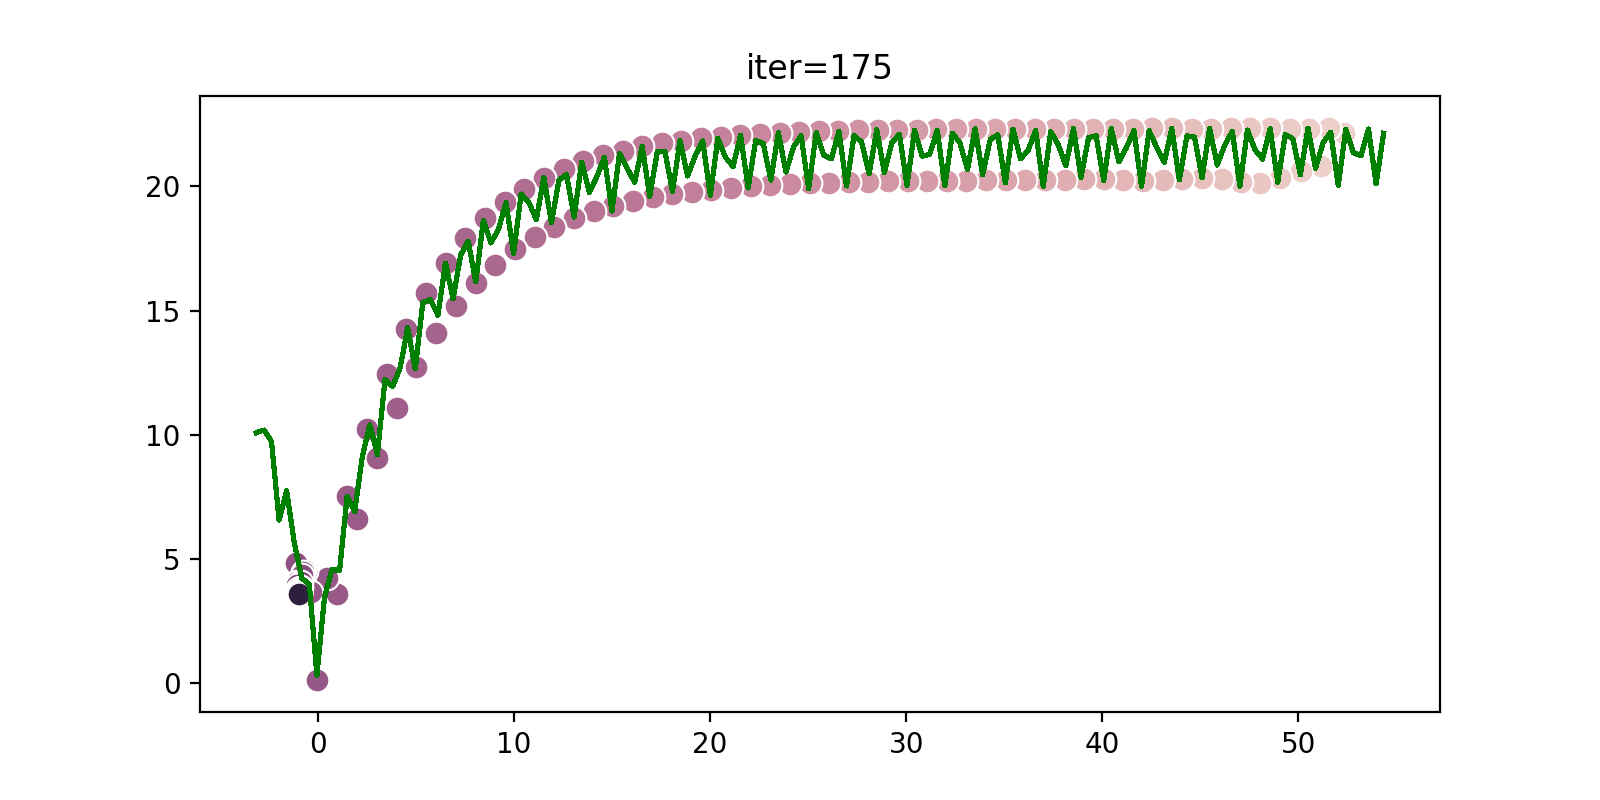

In [126]:
ana = post_analy1d(stats, ak_1d)
ana.animate_moving_position()

### two typical scenarios where adam fails

In [92]:
ad = adam()
x0 = np.array([12.64232])
optmizerParas = {
         'x0': x0,
         'alpha': 0.8,
         'beta_1': 0.9, 
         'beta_2': 0.999, 
         'epsilon': 1e-11, 
         'max_iter': 100,
         'tol': 1e-3,              
         'verbose': True,
         'record': True }
ad.set_parameters(optmizerParas)
arg, val, stats = ad.optimise(ak_1d)



*******starting optimisation from intitial point:  [12.642320]
total evaluatios = 48
gradient at stop position = [-1.732633],
modified graident = [-0.000023]
found minimum position = [13.981430], found minimum = 18.797693502901357


remark:

alpha slightly smaller than period is beneficial escape from local minimum

<IPython.core.display.Javascript object>


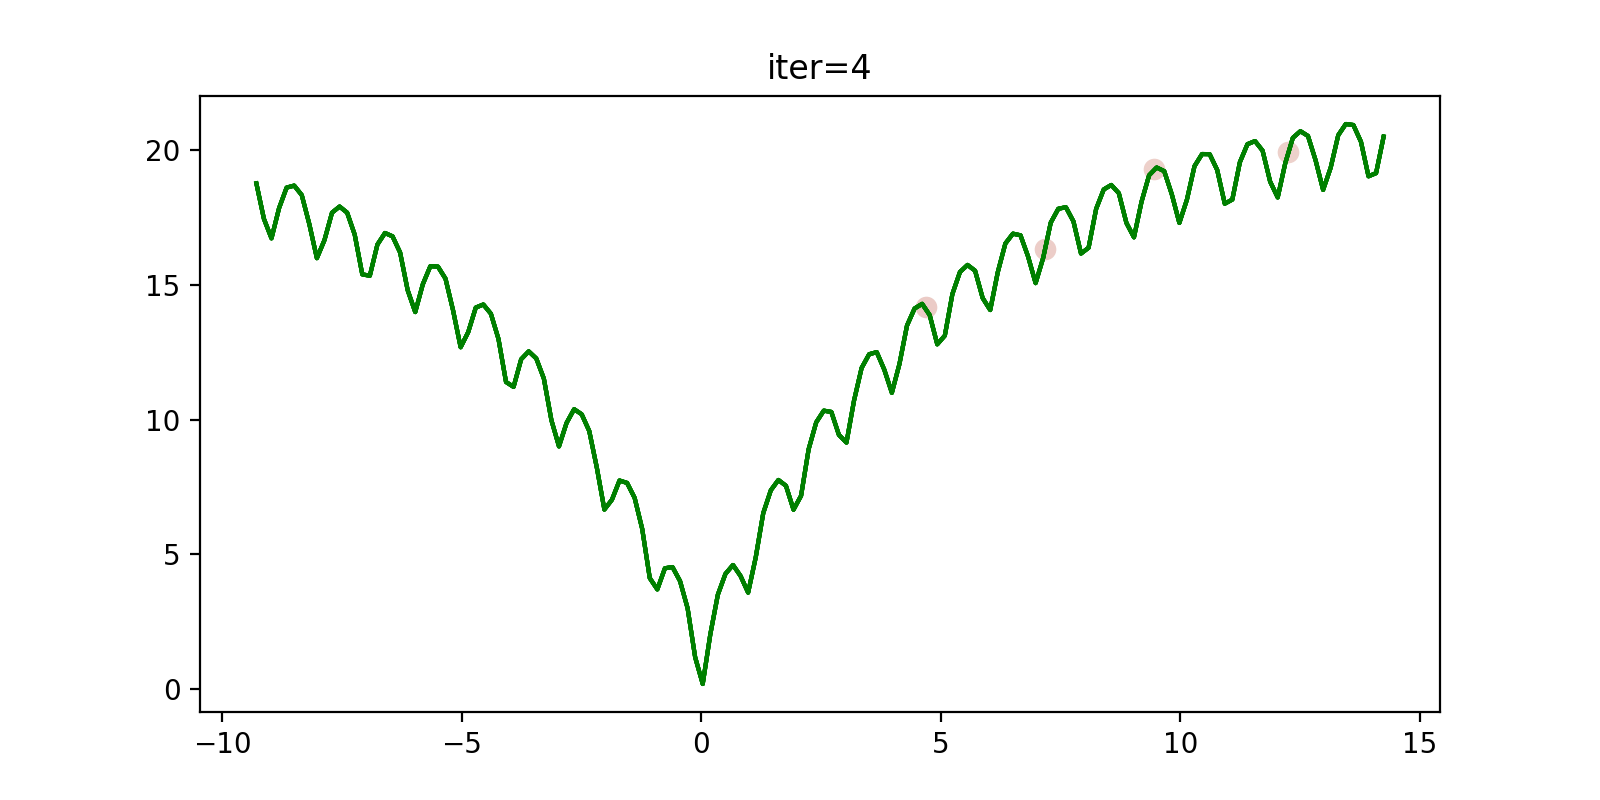

In [130]:
ana = post_analy1d(stats, ak_1d)
ana.animate_moving_position()

In [128]:
ad = adam()
x0 = np.array([12.24232])
optmizerParas = {
         'x0': x0,
         'alpha': 2.8,
         'beta_1': 0.9, 
         'beta_2': 0.999, 
         'epsilon': 1e-11, 
         'max_iter': 100,
         'tol': 1e-3,              
         'verbose': True,
         'record': True }
ad.set_parameters(optmizerParas)
arg, val, stats = ad.optimise(ak_1d)



*******starting optimisation from intitial point:  [12.242320]
total evaluatios = 100
gradient at stop position = [2.227919],
modified graident = [0.025357]
found minimum position = [4.936078], found minimum = 12.755674353032669


<IPython.core.display.Javascript object>


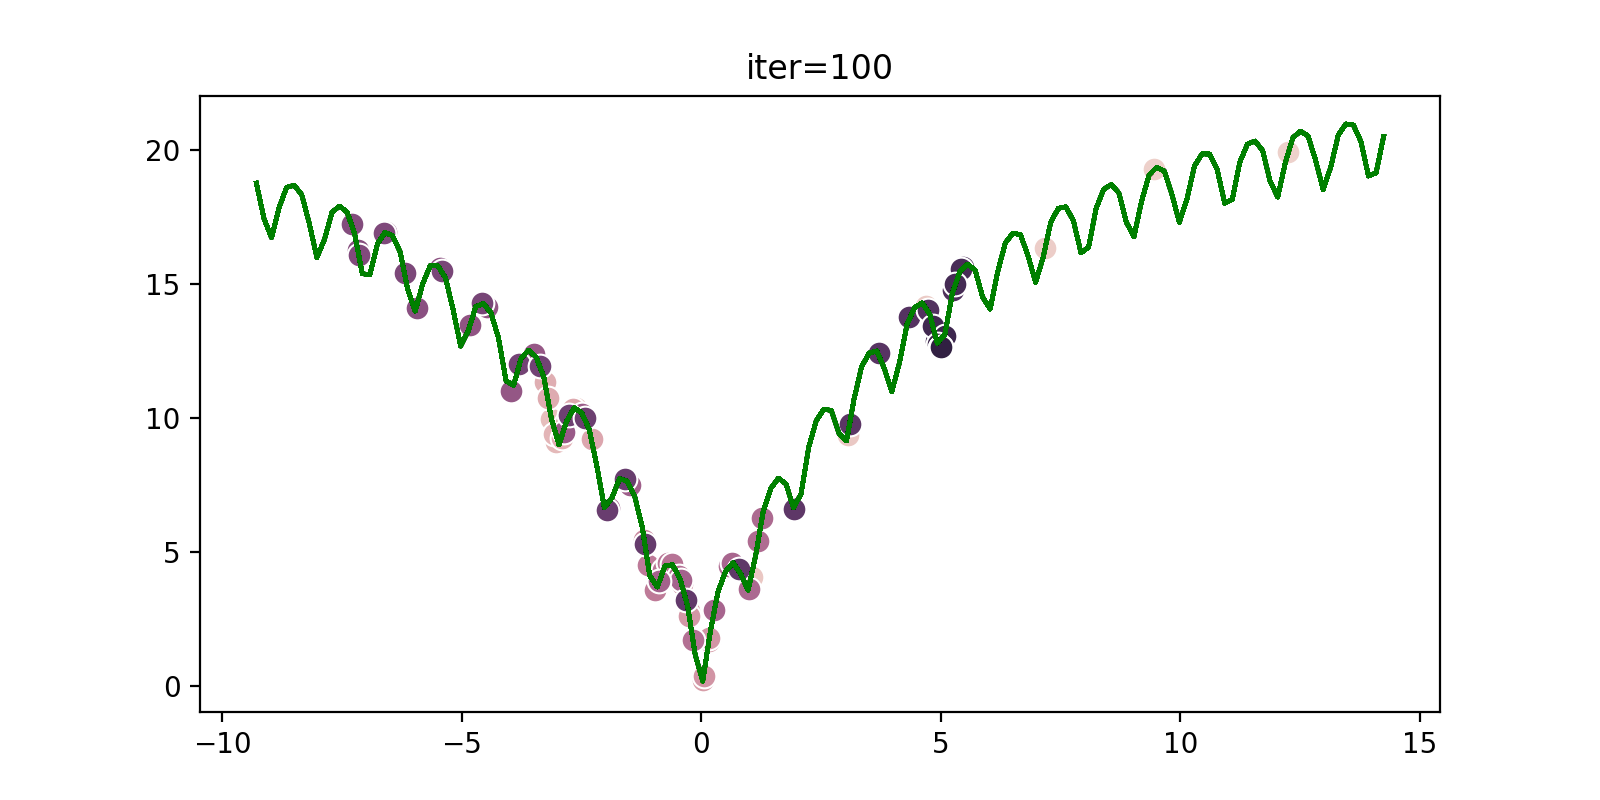

In [129]:
ana = post_analy1d(stats, ak_1d)
ana.animate_moving_position()

### cma

In [131]:
cma = cma_es(dim=1)
x0 = np.array([12.34232])
paras = {'x0': x0,
         'std': np.ones((1,)) * 3, 
         'tol': 1e-1, 
         'adjust_func': do_nothing(), 
         'record': True, 
         'verbose': True}
cma.set_parameters(paras)
arg, val, stats = cma.optimise(ak_1d)



*******starting optimisation from intitial mean:  [12.342320]
eigenvalue of variance = [1.065590]
total iterations = 18, total evaluatios = 72
found minimum position = [-0.004963], found minimum = 0.02116268387942144


<IPython.core.display.Javascript object>


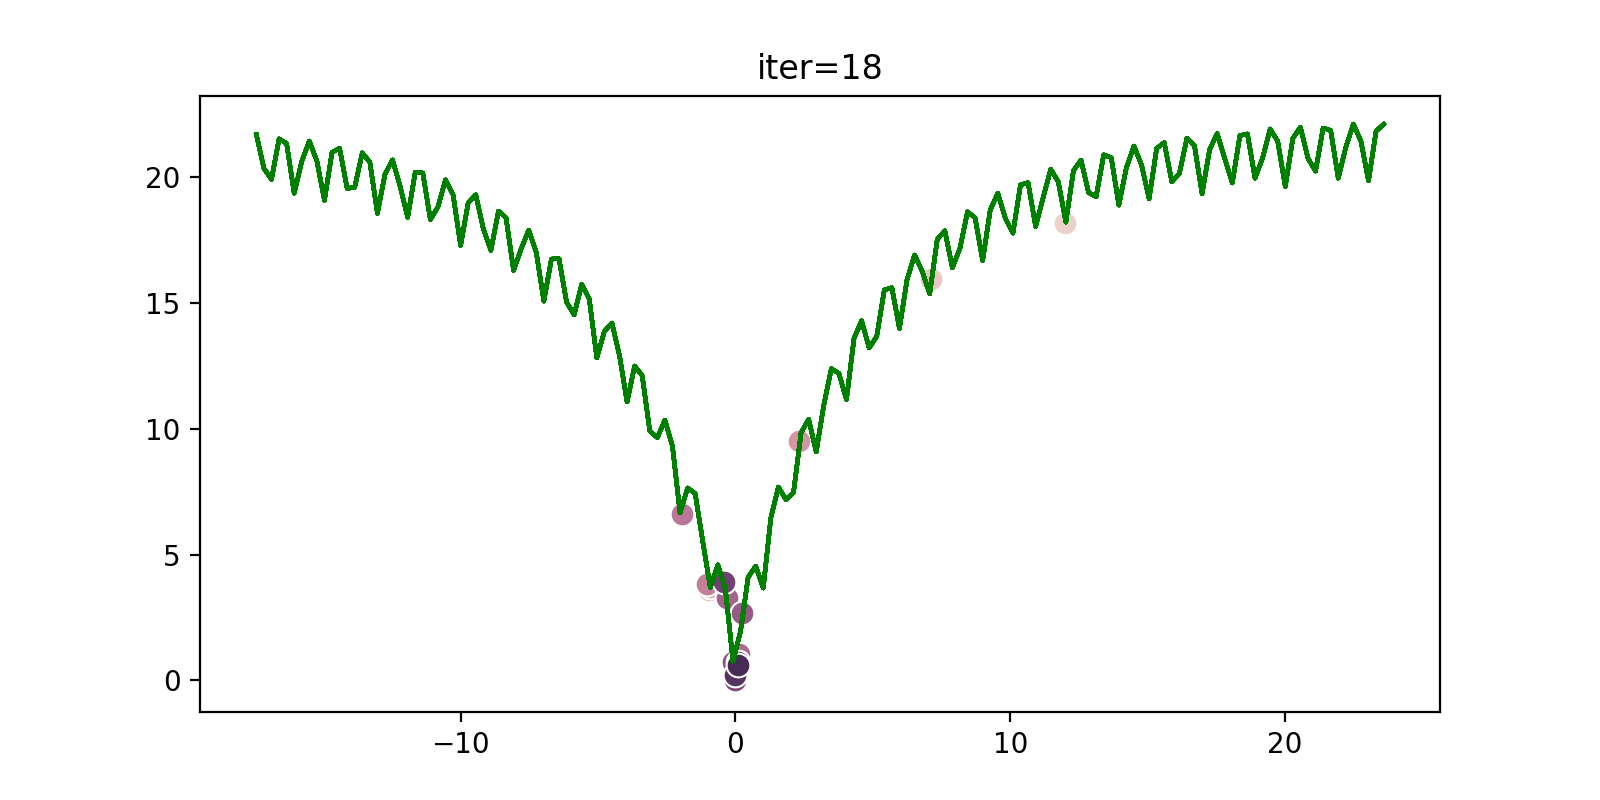

In [132]:
ana_cma = post_analy1d(stats, ak_1d)
ana_cma.animate_moving_position()

<IPython.core.display.Javascript object>


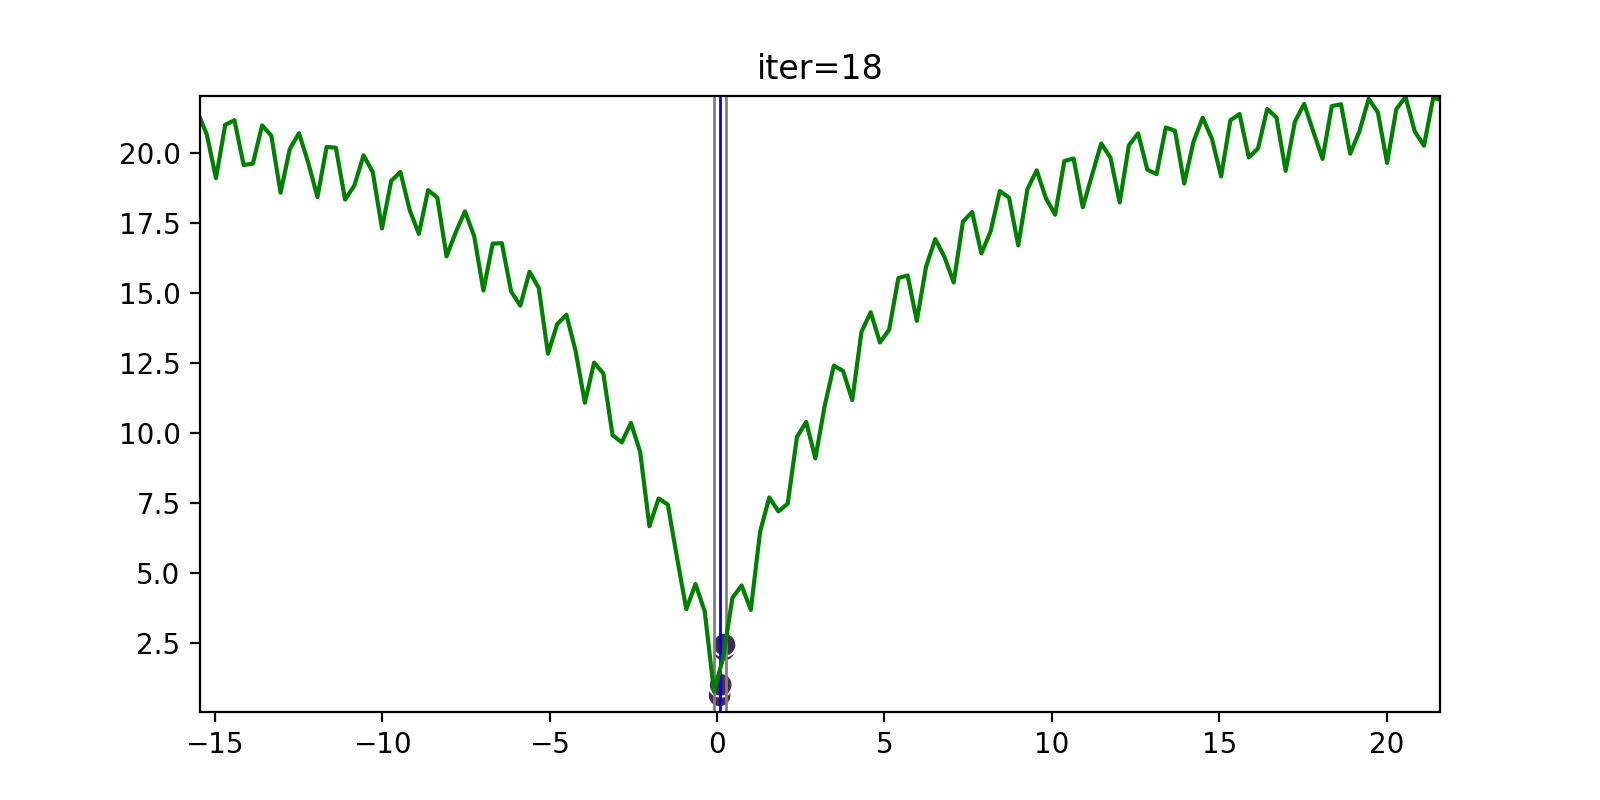

In [133]:
ana_cma = post_analy1d(stats, ak_1d)
ana_cma.animate_moving_cluster()

## failed case

In [134]:
np.random.seed(111321)
cma = cma_es(dim=1)
x0 = np.array([102.34232])
paras = {'x0': x0,
         'std': np.ones((1,)) * 30, 
         'tol': 1e-1, 
         'adjust_func': do_nothing(), 
         'record': True, 
         'verbose': True}
cma.set_parameters(paras)
arg, val, stats = cma.optimise(ak_1d)



*******starting optimisation from intitial mean:  [102.342320]
eigenvalue of variance = [1.523675]
total iterations = 40, total evaluatios = 160
found minimum position = [100.998268], found minimum = 20.00016084424605


<IPython.core.display.Javascript object>


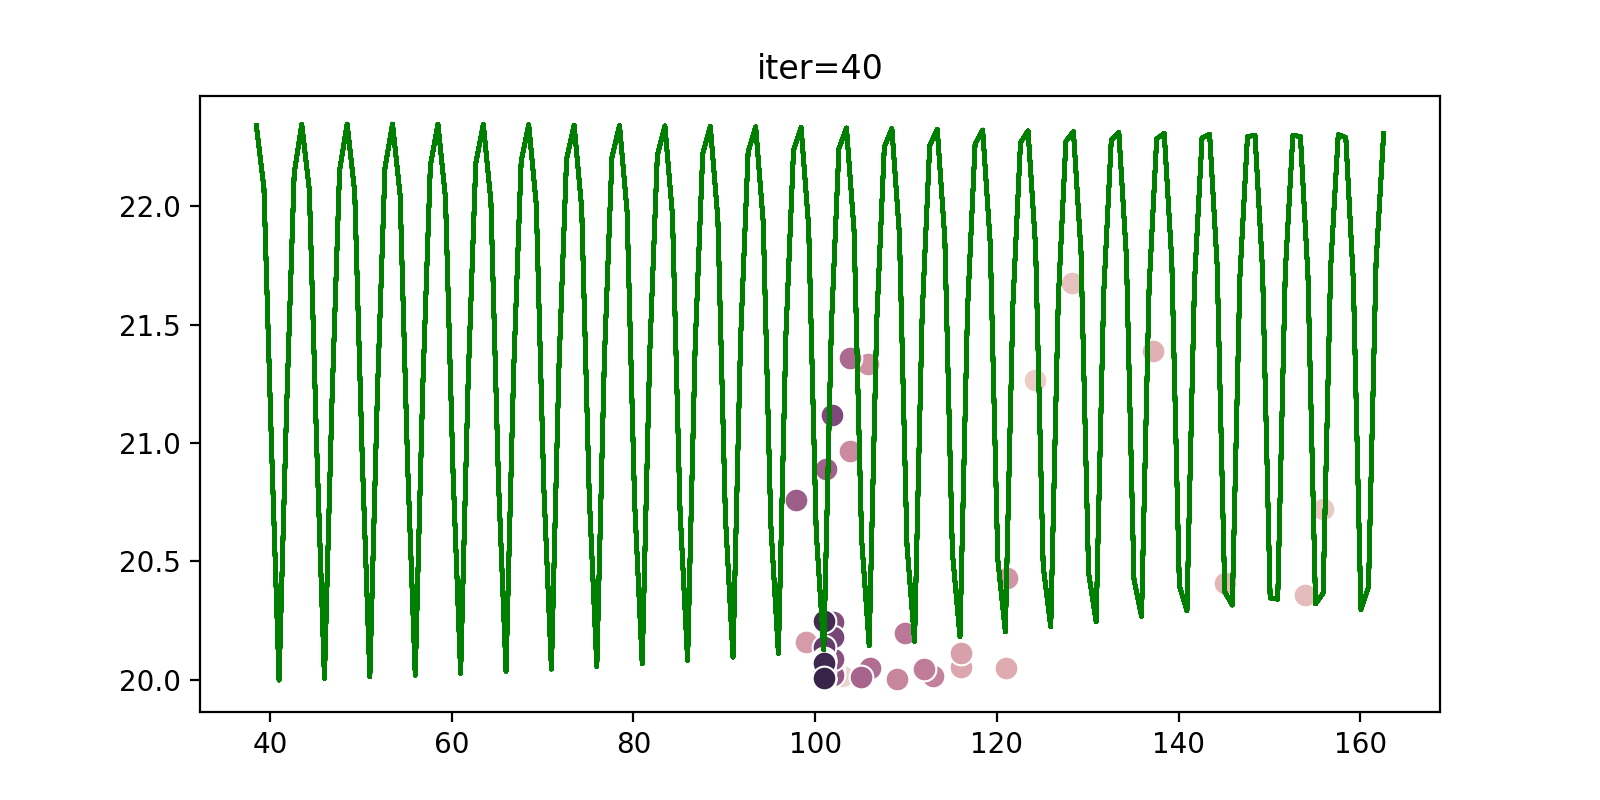

In [135]:
ana_cma = post_analy1d(stats, ak_1d)
ana_cma.animate_moving_position()

### turn it to success with only inserting line_search inner optimizer

In [136]:
np.random.seed(111321)
cma = cma_es(dim=1)
x0 = np.array([102.34232])
paras = {'x0': x0,
         'std': np.ones((1,)) * 30, 
         'tol': 1e-1, 
         'adjust_func': line_search(), 
         'record': True, 
         'verbose': True}
cma.set_parameters(paras)
arg, val, stats = cma.optimise(ak_1d)



*******starting optimisation from intitial mean:  [102.342320]
eigenvalue of variance = [7.970095]
total iterations = 16, total evaluatios = 2099
found minimum position = [0.000032], found minimum = 0.000130036759007357


<IPython.core.display.Javascript object>


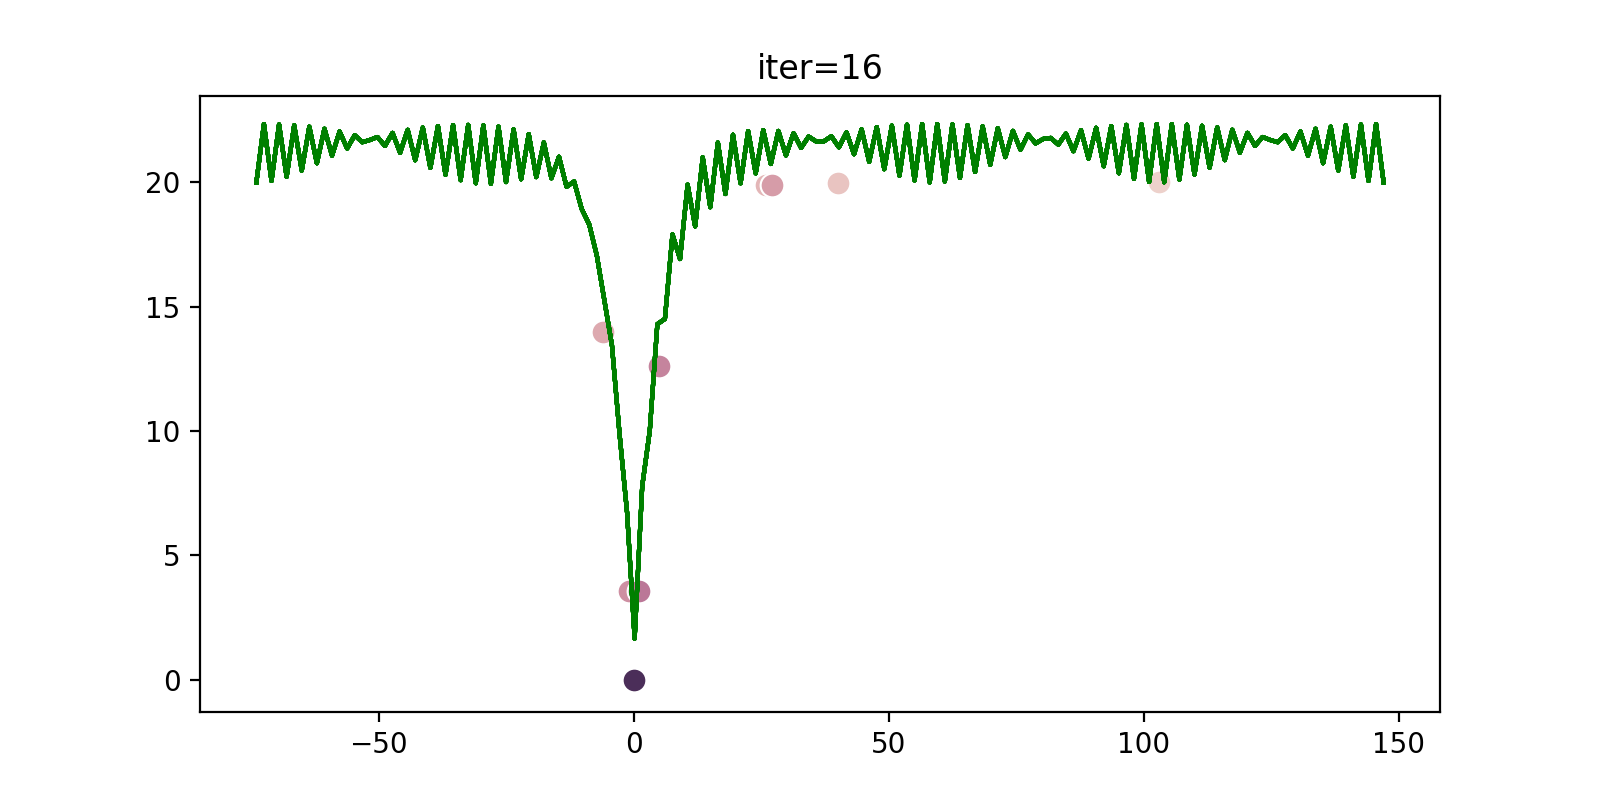

In [137]:
ana_cma = post_analy1d(stats, ak_1d)
ana_cma.animate_moving_position()

<IPython.core.display.Javascript object>


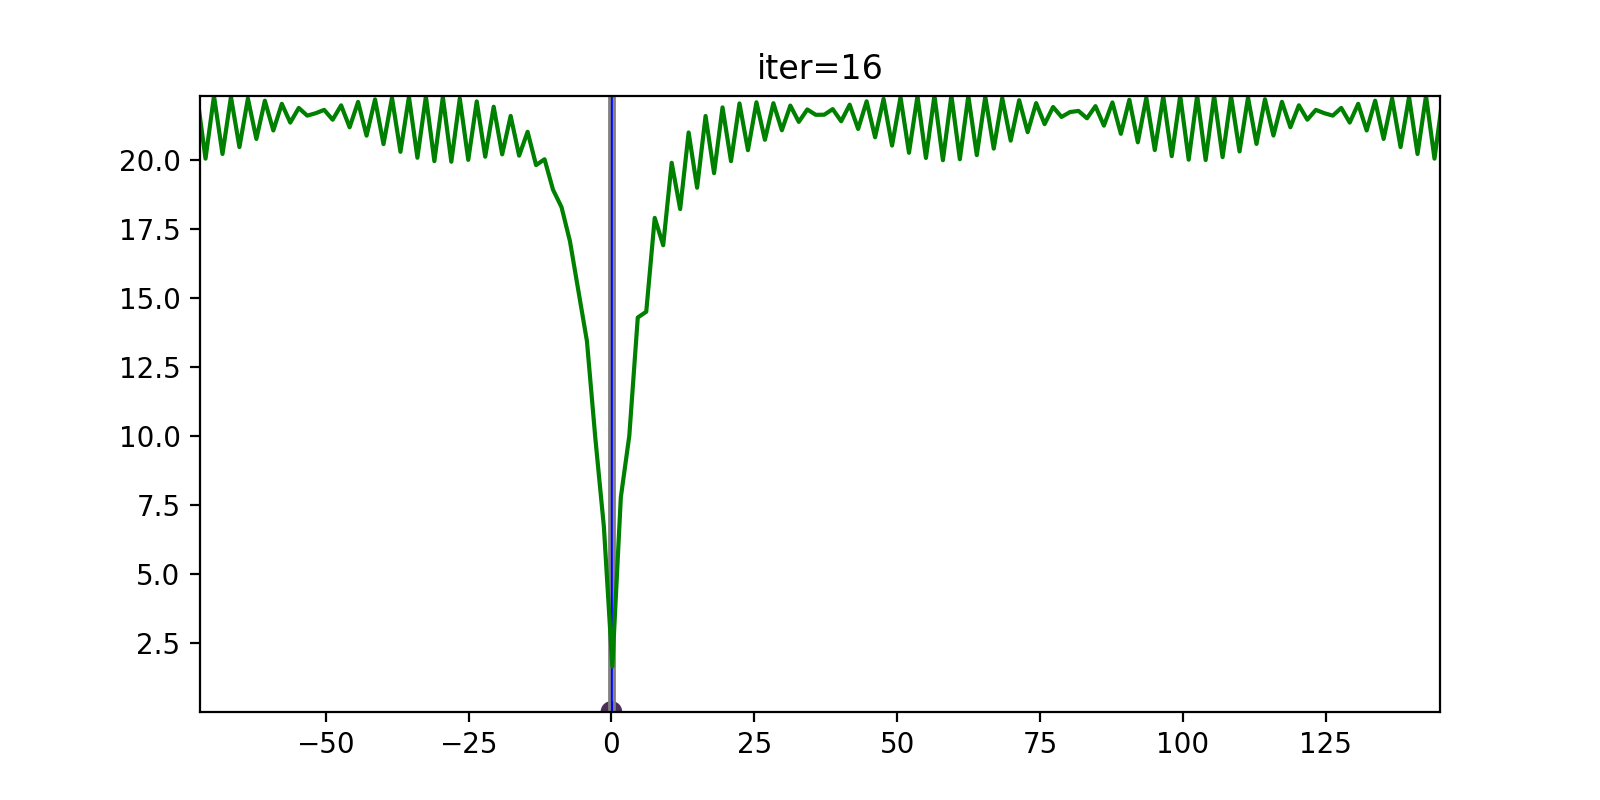

In [31]:
ana_cma.animate_moving_cluster()

# find the best setp size of Adam, on Ackley 1D

## ackley

In [2]:
class adam_inner_alpha(adam):
    # override the method of parent class
    def adjust(self, alpha, obj):
        self.alpha = alpha
        #print("\n starting optimisation from intitial parameter: ", alpha)
        arg, val, stats = self.optimise(obj)
        #print("val: ", val)
        return alpha, val, stats['evals']

In [44]:
def optimise_alpha(optimizer, alpha0, std):
    cma = cma_es(dim=alpha0.shape[0])

    paras = {'x0': alpha0,
             'std': np.ones((1,)) * std, 
             'tol': 1e-2, 
             'max_iter': 50,
             'adjust_func': optimizer, 
             'record': False, 
             'verbose': True}
    cma.set_parameters(paras)
    arg, val, stats = cma.optimise(ackley(dim=x0.shape[0]))
    return arg

### optimise  alpha parameter of Adam 1D

In [142]:
ad = adam_inner_alpha()
ak = ackley(dim=1)
x0 = np.array([52.34232])
random_alpha = np.array([0.8])
optmizerParas = {
         'x0': x0,
         'alpha': random_alpha,
         'beta_1': 0.9, 
         'beta_2': 0.999, 
         'epsilon': 1e-11, 
         'max_iter': 200,
         'tol': 1e-3,              
         'verbose': True,
         'record': False }
ad.set_parameters(optmizerParas)
arg, val, stats = ad.optimise(ak)



*******starting optimisation from intitial point:  [52.342320]
total evaluatios = 175
gradient at stop position = [-0.443355],
modified graident = [-0.000622]
found minimum position = [-0.972435], found minimum = 3.5752277570691047


In [143]:
optmizerParas = {
         'x0': x0,
         'alpha': random_alpha,
         'beta_1': 0.9, 
         'beta_2': 0.999, 
         'epsilon': 1e-11, 
         'max_iter': 200,
         'tol': 1e-3,              
         'verbose': False,
         'record': False }
ad.set_parameters(optmizerParas)
best_alpha = optimise_alpha(ad, random_alpha, std=0.5)



*******starting optimisation from intitial mean:  [0.800000]
eigenvalue of variance = [0.189565]
total iterations = 20, total evaluatios = 8790
found minimum position = [1.065736], found minimum = 0.13791361895422982


In [144]:
optmizerParas = {
         'x0': x0,
         'alpha': best_alpha,
         'beta_1': 0.9, 
         'beta_2': 0.999, 
         'epsilon': 1e-11, 
         'max_iter': 200,
         'tol': 1e-3,              
         'verbose': True,
         'record': False }
ad.set_parameters(optmizerParas)
arg, val, stats = ad.optimise(ak)



*******starting optimisation from intitial point:  [52.342320]
total evaluatios = 200
gradient at stop position = [-6.826737],
modified graident = [-0.049538]
found minimum position = [0.025736], found minimum = 0.13791361895422982


## optimise alpha of adam 2D

In [78]:
ad = adam_inner_alpha()
ak2 = ackley(dim=2)
x0 = np.array([21.423, 53.223])
random_alpha = np.array([1.2])
optmizerParas = {
         'x0': x0,
         'alpha': random_alpha,
         'beta_1': 0.9, 
         'beta_2': 0.999, 
         'epsilon': 1e-11, 
         'max_iter': 200,
         'tol': 1e-3,              
         'verbose': True,
         'record': True }
ad.set_parameters(optmizerParas)

arg, val, stats = ad.optimise(ak2)



*******starting optimisation from intitial point:  [21.423000 53.223000]
total evaluatios = 200
gradient at stop position = [1.472440 1.380937],
modified graident = [0.833248 0.050402]
found minimum position = [-178.971911 50.965749], found minimum = 20.051962160635828


In [83]:
ad.verbose = False
best_alpha = optimise_alpha(ad, random_alpha, std=6)



*******starting optimisation from intitial mean:  [1.200000]
eigenvalue of variance = [4.811480]
total iterations = 14, total evaluatios = 7913
found minimum position = [4.142601], found minimum = 5.043788538634946


In [84]:
optmizerParas = {
         'x0': x0,
         'alpha': best_alpha,
         'beta_1': 0.9, 
         'beta_2': 0.999, 
         'epsilon': 1e-11, 
         'max_iter': 200,
         'tol': 1e-3,              
         'verbose': True,
         'record': True }
ad.set_parameters(optmizerParas)
arg, val, stats = ad.optimise(ak2)



*******starting optimisation from intitial point:  [21.423000 53.223000]
total evaluatios = 200
gradient at stop position = [-2.171062 5.394534],
modified graident = [-0.335406 0.606229]
found minimum position = [1.296407 -0.185204], found minimum = 5.043788538634946


## optimise alpha of adam 2D zones

In [42]:
def do_multiple_exps_on_ackley(optimizer ,seed):
    
    np.random.seed(seed)

    # init multiple experiments
    exps = multiple_experiment()

    # init and setup one experiment
    exp = single_experiment()

    # One experiment: setup objective function
    ak = ackley()
    exp.set_objective(ak)

    # One experiment: setup optimizer

    exp.set_optimizer(optimizer)

    # Multiple experiment: setup one expreiment
    exps.set_single_exp(exp)

    # Multiple experiments: setup sample zone of multiple experiments
    zoneParas = {'origin': np.array([0,0]),
                 'edge': np.array([500, 500]),
                 'step': 100,
                 'size': 5,
                 'sym': True}
    exps.set_sample_zone(zoneParas)
    data = exps.do()
    
    num = zoneParas['edge'][0] / zoneParas['step']
    num = (num + 1) * num / 2
    print("\navg probility of converge: ", data['res'].sum() / num)
    print("avg func value: ", data['cost'].sum() / num)
    print("avg evals per exp: ", data['evals'].sum() / num)
    print("\n")
    
    return exps.analyser

In [102]:
class adam_multi_inner_alpha(adam):
    # override the method of parent class
    def adjust(self, alpha, obj):
        self.alpha = alpha
        num = 30
        costs = np.zeros((num,))
        points = np.random.rand(num, obj.dim) * 500
        for i, starting_point in enumerate(points):
            self.x0 = starting_point
            _, costs[i], _ = self.optimise(obj)
        print("val: ", costs.mean())
        return alpha, costs.mean(), stats['evals']

In [104]:
ad = adam_multi_inner_alpha()
random_alpha = np.array([1.5])
optmizerParas = {
         'x0': None,
         'alpha': random_alpha,
         'beta_1': 0.9, 
         'beta_2': 0.999, 
         'epsilon': 1e-11, 
         'max_iter': 200,
         'tol': 1e-3,              
         'verbose': False,
         'record': False }
ad.set_parameters(optmizerParas)
%time ana = do_multiple_exps_on_ackley(ad, SEED)

complete: 1 / 15 
complete: 3 / 15 
complete: 6 / 15 
complete: 10 / 15 
complete: 15 / 15 

avg probility of converge:  0.0
avg func value:  20.057002988346856
avg evals per exp:  190.33333333333334


CPU times: user 892 ms, sys: 59.8 ms, total: 952 ms
Wall time: 927 ms


In [105]:
best_alpha = optimise_alpha(ad, random_alpha, std=1)



*******starting optimisation from intitial mean:  [1.500000]
val:  21.437915554168377
val:  20.188799388029008
val:  19.85536082210655
val:  20.040061350929697
val:  20.0021976478154
val:  19.989321139005977
val:  19.985019405926877
val:  20.003851702724457
val:  20.102796474018227
val:  20.152544310148397
val:  20.000020076749777
val:  20.000935578350305
val:  20.008850867668414
val:  20.159205967659243
val:  22.34895404326035
val:  20.00241793435436
val:  20.005656326408875
val:  20.03141065991199
val:  20.04323528914495
val:  20.004155291128214
val:  20.0370444573227
val:  20.00082448320021
val:  20.000351722759227
val:  19.981136468884223
val:  20.000878786304643
val:  20.001869896143635
val:  20.00083024420437
val:  20.00069338897361
val:  20.003201523460156
val:  19.987092801040816
val:  19.991432398971487
val:  19.998763742717067
val:  20.001385068947055
val:  20.000945023165517
val:  20.0004617584632
val:  20.0002381525893
val:  20.000387216114213
val:  20.002728624794653
val

In [100]:
optmizerParas = {
         'x0': None,
         'alpha': best_alpha,
         'beta_1': 0.9, 
         'beta_2': 0.999, 
         'epsilon': 1e-11, 
         'max_iter': 200,
         'tol': 1e-3,              
         'verbose': False,
         'record': False }
ad.set_parameters(optmizerParas)
%time ana = do_multiple_exps_on_ackley(ad, SEED)

complete: 1 / 15 
complete: 3 / 15 
complete: 6 / 15 
complete: 10 / 15 
complete: 15 / 15 

avg probility of converge:  0.0
avg func value:  20.039295312811404
avg evals per exp:  185.37333333333333


CPU times: user 815 ms, sys: 91.9 ms, total: 907 ms
Wall time: 835 ms


## bukin

In [ ]:
for i in range(0, 10):
    # One experiment: setup optimizer
    ad = adam()
    optmizerParas = {'x0': np.zeros((2,)),
             'alpha': 0.01* np.power(0.1, i),
             'beta_1': 0.9, 
             'beta_2': 0.999, 
             'epsilon': 1e-8, 
             'max_iter': 1000,
             'tol': 1e-2,              
             'verbose': True,
             'record': False}
    ad.set_parameters(optmizerParas)
    exp.set_optimizer(ad)

    # Multiple experiment: setup one expreiment
    exps_bk_ad.set_single_exp(exp)


    # Multiple experiments: setup sample zone of multiple experiments
    zoneParas = {'origin': np.array([-15, -5]),
                 'edge': np.array([30, 10]),
                 'step': 10,
                 'size': 10,
                 'sym': False}
    exps_bk_ad.set_sample_zone(zoneParas)

    %time data_bk_ad = exps_bk_ad.do()